# Hypothesis Testing in Python

## Hypothesis Testing Fundamentals

### Hypothesis Tests and Z-Scores

In [29]:
import pandas as pd
stack_overflow = pd.read_feather(r'./data/stack_overflow.feather')
stack_overflow.head(3)

,respondent,main_branch,hobbyist,age,age_1st_code,age_first_code_cut,comp_freq,comp_total,converted_comp,country,...,survey_length,trans,undergrad_major,webframe_desire_next_year,webframe_worked_with,welcome_change,work_week_hrs,years_code,years_code_pro,age_cat
0,36.0,"I am not primarily a developer, but I write co...",Yes,34.0,30.0,adult,Yearly,60000.0,77556.0,United Kingdom,...,Appropriate in length,No,"Computer science, computer engineering, or sof...",Express;React.js,Express;React.js,Just as welcome now as I felt last year,40.0,4.0,3.0,At least 30
1,47.0,I am a developer by profession,Yes,53.0,10.0,child,Yearly,58000.0,74970.0,United Kingdom,...,Appropriate in length,No,"A natural science (such as biology, chemistry,...",Flask;Spring,Flask;Spring,Just as welcome now as I felt last year,40.0,43.0,28.0,At least 30
2,69.0,I am a developer by profession,Yes,25.0,12.0,child,Yearly,550000.0,594539.0,France,...,Too short,No,"Computer science, computer engineering, or sof...",Django;Flask,Django;Flask,Just as welcome now as I felt last year,40.0,13.0,3.0,Under 30


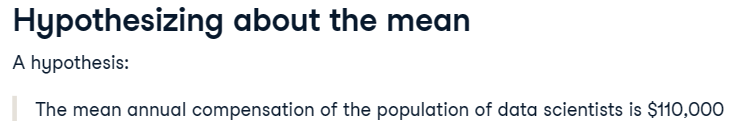

In [30]:
mean_comp_samp = stack_overflow['converted_comp'].mean()
print(f'Calculated mean of compensation {mean_comp_samp:,.2f}')

Calculated mean of compensation 119,574.72


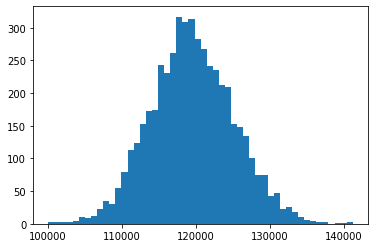

In [31]:
# Generate a bootstrap distribution
import numpy as np
import matplotlib.pyplot as plt
so_boot_distn = [np.mean(stack_overflow.sample(frac=1, replace=True)['converted_comp']) for _ in range(5000)]
plt.hist(so_boot_distn, bins=50)
plt.show()

In [32]:
# Standard Error
std_error = np.std(so_boot_distn, ddof=1)
print(std_error)

5620.933128341679


#### Z Score

$$z = {sample stat - hypoth.param.value \over standard error}

In [33]:
# Z Score
mean_comp_hyp = 110000
z_score = (mean_comp_samp - mean_comp_hyp)/std_error
print(z_score)

1.7034035387135646


In [34]:
late_shipments = pd.read_feather(r'./data/late_shipments.feather')
late_shipments.head(3)

,id,country,managed_by,fulfill_via,vendor_inco_term,shipment_mode,late_delivery,late,product_group,sub_classification,...,line_item_quantity,line_item_value,pack_price,unit_price,manufacturing_site,first_line_designation,weight_kilograms,freight_cost_usd,freight_cost_groups,line_item_insurance_usd
0,36203.0,Nigeria,PMO - US,Direct Drop,EXW,Air,1.0,Yes,HRDT,HIV test,...,2996.0,266644.0,89.0,0.89,"Alere Medical Co., Ltd.",Yes,1426.0,33279.83,expensive,373.83
1,30998.0,Botswana,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test,...,25.0,800.0,32.0,1.60,"Trinity Biotech, Plc",Yes,10.0,559.89,reasonable,1.72
2,69871.0,Vietnam,PMO - US,Direct Drop,EXW,Air,0.0,No,ARV,Adult,...,22925.0,110040.0,4.8,0.08,Hetero Unit III Hyderabad IN,Yes,3723.0,19056.13,expensive,181.57


In [35]:
# Calculate the proportion of late shipments
late_prop_samp = (late_shipments['late']=='Yes').mean()

# Print the results
print(late_prop_samp*100)

6.1


In [36]:
late_shipments_boot_distn = [np.mean(late_shipments.sample(frac=1, replace=True)['late_delivery']) for _ in range(5000)]
late_prop_hyp = 0.06
std_error = np.std(late_shipments_boot_distn, ddof=1)
print(std_error)

0.00777577504146687


In [37]:
z_score = (late_prop_samp - late_prop_hyp) / std_error
print(z_score)

0.128604543555745


### p_values

In [38]:
val = 'facebookfac'
dashes = []
n=2
hyp=0
for _ in val[::-1]:
    if hyp==n:
        dashes.extend(['-',_])
        hyp=1
    else:
        dashes.append(_)
        hyp += 1
''.join(dashes[::-1])


'f-ac-eb-oo-kf-ac'

In [39]:
def divide_string(string, parts):
    substrings = [string[::-1][i:i + parts] for i in range(0, len(string), parts)]

    if len(substrings) > parts:
        substrings[-2] += substrings[-1]
        substrings.pop()

    return '-'.join(substrings)

string = "paper"
parts = 3

result = divide_string(string, parts)
print(result)

rep-ap


In [40]:
len(string)

5

In [41]:
import textwrap as tw
string='computercomputercomp'
N=6
lst = '-'.join([_[::-1] for _ in tw.wrap(string[::-1], N)[::-1]])


In [42]:
lst = ['12.0.4.1', '3.3.1.12', '12.0.3.1', '3.1', '12.1', '4.5', '4.4.1', '3.3.1.3', '3.2.1']
result=[]
for number in lst:
    int_parts = [int(part) for part in str(number).split('.')]
    result.append(int_parts)
sorted(result)

[[3, 1],
 [3, 2, 1],
 [3, 3, 1, 3],
 [3, 3, 1, 12],
 [4, 4, 1],
 [4, 5],
 [12, 0, 3, 1],
 [12, 0, 4, 1],
 [12, 1]]

In [43]:
# version_strings = [ 12.0.4.1, 3.3.1.12, 12.0.3.1, 3.1, 12.1, 4.5, 4.4.1, 3.3.1.3, 3.2.1]

# Function to convert version string to a list of integers
def version_key(version):
    return [int(part) for part in str(version).split('.') if part]

# Sort the list using the custom key function
sorted_versions = sorted(lst, key=version_key)

# Output the sorted list
print(sorted_versions)

['3.1', '3.2.1', '3.3.1.3', '3.3.1.12', '4.4.1', '4.5', '12.0.3.1', '12.0.4.1', '12.1']


### p-values

In [44]:
z_score = (late_prop_samp-late_prop_hyp)/std_error
z_score

0.128604543555745

In [45]:
import scipy.stats as scs
p_value = 1 - scs.norm.cdf(z_score, loc=0, scale=1)
p_value

0.44883528546503815

In [46]:
# Calculate 95% confidence interval using quantile method
lower = np.quantile(late_shipments_boot_distn, 0.025)
upper = np.quantile(late_shipments_boot_distn, 0.975)

# Print the confidence interval
print((lower, upper))

(0.046, 0.076)


In [47]:
late_prop_hyp

0.06

When you have a confidence interval width equal to one minus the significance level,<br>
if the hypothesized population parameter is within the confidence interval,<br>
you should <b>fail to reject</b> the null hypothesis.

## Two-Sample and ANOVA Tests

### Performing T Tests

In [48]:
stack_overflow.head()

,respondent,main_branch,hobbyist,age,age_1st_code,age_first_code_cut,comp_freq,comp_total,converted_comp,country,...,survey_length,trans,undergrad_major,webframe_desire_next_year,webframe_worked_with,welcome_change,work_week_hrs,years_code,years_code_pro,age_cat
0,36.0,"I am not primarily a developer, but I write co...",Yes,34.0,30.0,adult,Yearly,60000.0,77556.0,United Kingdom,...,Appropriate in length,No,"Computer science, computer engineering, or sof...",Express;React.js,Express;React.js,Just as welcome now as I felt last year,40.0,4.0,3.0,At least 30
1,47.0,I am a developer by profession,Yes,53.0,10.0,child,Yearly,58000.0,74970.0,United Kingdom,...,Appropriate in length,No,"A natural science (such as biology, chemistry,...",Flask;Spring,Flask;Spring,Just as welcome now as I felt last year,40.0,43.0,28.0,At least 30
2,69.0,I am a developer by profession,Yes,25.0,12.0,child,Yearly,550000.0,594539.0,France,...,Too short,No,"Computer science, computer engineering, or sof...",Django;Flask,Django;Flask,Just as welcome now as I felt last year,40.0,13.0,3.0,Under 30
3,125.0,"I am not primarily a developer, but I write co...",Yes,41.0,30.0,adult,Monthly,200000.0,2000000.0,United States,...,Appropriate in length,No,None,None,None,Just as welcome now as I felt last year,40.0,11.0,11.0,At least 30
4,147.0,"I am not primarily a developer, but I write co...",No,28.0,15.0,adult,Yearly,50000.0,37816.0,Canada,...,Appropriate in length,No,"Another engineering discipline (such as civil,...",None,Express;Flask,Just as welcome now as I felt last year,40.0,5.0,3.0,Under 30


In [49]:
[_ for _ in stack_overflow.columns if _.startswith('age')]

['age', 'age_1st_code', 'age_first_code_cut', 'age_cat']

In [50]:
stack_overflow['age_first_code_cut'].unique()

array(['adult', 'child'], dtype=object)

#### Hypotheses
<i>H0:</i> Them mean compensation (in USD) is same for those that coded first as a child and 
those that coded first as an adult.<br>
<i>H1:</i> Them mean compensation (in USD) is greater for those that coded first as a child and those that coded first as an adult.

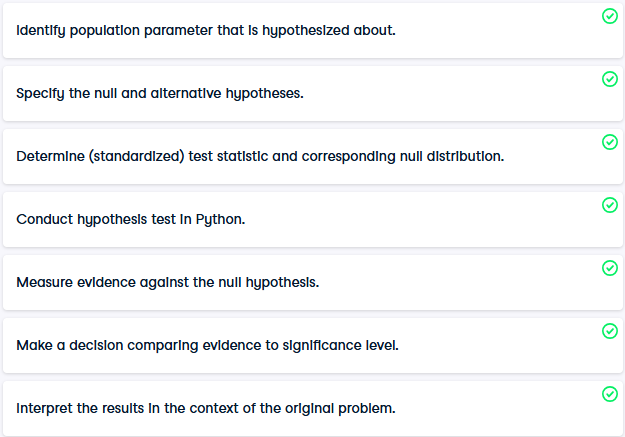

In [51]:
print(f"{stack_overflow['converted_comp'].mean():,.2f}")

119,574.72


In [52]:
stack_overflow.groupby(by='age_first_code_cut')['converted_comp'].mean()

age_first_code_cut
adult    111313.311047
child    132419.570621
Name: converted_comp, dtype: float64

In [53]:
# https://katex.org/docs/supported.html

#### Z Score

$$z = {sample stat - hypoth.param.value \over standard error}

$$t = {difference in sample stats - difference in population parameters \over standard error}

$$t = {(\bar{x}_{child} - \bar{x}_{adult}) - (\mu_{child}-\mu_{adult}) \over SE(\bar{x}_{child}-\bar{x}_{adult})}


#### Standard Error
$SE(\bar{x}_{child}-\bar{x}_{adult})$ $\approx$ $\sqrt{\frac{s^2_{\text{child}}}{n_{\text{child}}} + \frac{s^2_{\text{adult}}}{n_{\text{adult}}}}$


As <i>Ho</i> is $\mu_{child}-\mu_{adult}=0$

In [54]:
xbar = stack_overflow.groupby(by='age_first_code_cut')['converted_comp'].mean()
s = stack_overflow.groupby(by='age_first_code_cut')['converted_comp'].std()
n = stack_overflow.groupby(by='age_first_code_cut')['converted_comp'].count()
print(xbar, s, n)

age_first_code_cut
adult    111313.311047
child    132419.570621
Name: converted_comp, dtype: float64 age_first_code_cut
adult    271546.521729
child    255585.240115
Name: converted_comp, dtype: float64 age_first_code_cut
adult    1376
child     885
Name: converted_comp, dtype: int64


In [55]:
import numpy as np
numerator =xbar['child']-xbar['adult']
denominator = np.sqrt(s['child']**2 / n['child'] + s['adult']**2/n['adult'])
t_stat = numerator/denominator
t_stat

1.8699313316221844

### Calculating p-values from t-statistics

In [59]:
print(t_stat, n['child'], n['adult'])

1.8699313316221844 885 1376


In [61]:
degrees_of_freedom = n['child']+n['adult']-2
degrees_of_freedom

2259

In [64]:
import scipy
p_value = 1-scipy.stats.t.cdf(t_stat, df=degrees_of_freedom)
p_value

0.030811302165157595

### Paired t-tests

In [66]:
repub_votes_potus_08_12 = pd.read_feather(r'./data/repub_votes_potus_08_12.feather')
repub_votes_potus_08_12.head()

,state,county,repub_percent_08,repub_percent_12
0,Alabama,Hale,38.957877,37.139882
1,Arkansas,Nevada,56.726272,58.983452
2,California,Lake,38.896719,39.331367
3,California,Ventura,42.923190,45.250693
4,Colorado,Lincoln,74.522569,73.764757


#### Hypotheses <br>
Question: Was the percentage of Republican candidate votes lower in 2008 that 2012?<br>
$H_0: \mu_{2008} - \mu_{2012} = 0$ <br>
$H_A: \mu_{2008} - \mu_{2012} < 0$

<Axes: >

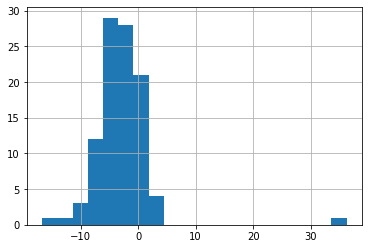

In [67]:
sample_data = repub_votes_potus_08_12
sample_data['diff'] = sample_data['repub_percent_08'] - sample_data['repub_percent_12']
import matplotlib.pyplot as plt
sample_data['diff'].hist(bins=20)

In [68]:
xbar = sample_data['diff'].mean()
xbar

-2.877109041242944

#### New Hypotheses
$H_0: \mu_{diff} = 0$ <br>
$H_A: \mu_{diff} < 0$ <br>

$t = \bar{x}_{diff} - \mu_{diff} \over \sqrt{\frac{s^2_{\text{diff}}}{n_{\text{diff}}} }$

$df = n_{diff}-1$

In [69]:
n_diff = len(sample_data)
s_diff = sample_data['diff'].std()
t_stat = (xbar-0) / np.sqrt(s_diff**2/n_diff)
print(n_diff, s_diff, t_stat)

100 5.136737887231852 -5.601043121928489


In [70]:
p_value = scipy.stats.t.cdf(t_stat, df=n_diff-1)
p_value

9.572537285272411e-08

In [74]:
# !pip install pingouin
import pingouin

In [75]:
pingouin.ttest(
  x=sample_data['diff'],
  y=0,
  alternative="less"
)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-5.601043,99,less,9.572537e-08,"[-inf, -2.02]",0.560104,1.323e+05,0.999955


In [76]:
pingouin.ttest(
  x=sample_data['repub_percent_08'],
  y=sample_data['repub_percent_12'],
  paired=True,
  alternative="less"
)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-5.601043,99,less,9.572537e-08,"[-inf, -2.02]",0.217364,1.323e+05,0.696338


In [77]:
pingouin.ttest(
  x=sample_data['repub_percent_08'],
  y=sample_data['repub_percent_12'],
  paired=False, # The default
  alternative="less"
)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.536997,198,less,0.062945,"[-inf, 0.22]",0.217364,0.927,0.454972


### ANOVA tests

In [78]:
stack_overflow['job_sat'].value_counts()

Very satisfied           879
Slightly satisfied       680
Slightly dissatisfied    342
Neither                  201
Very dissatisfied        159
Name: job_sat, dtype: int64

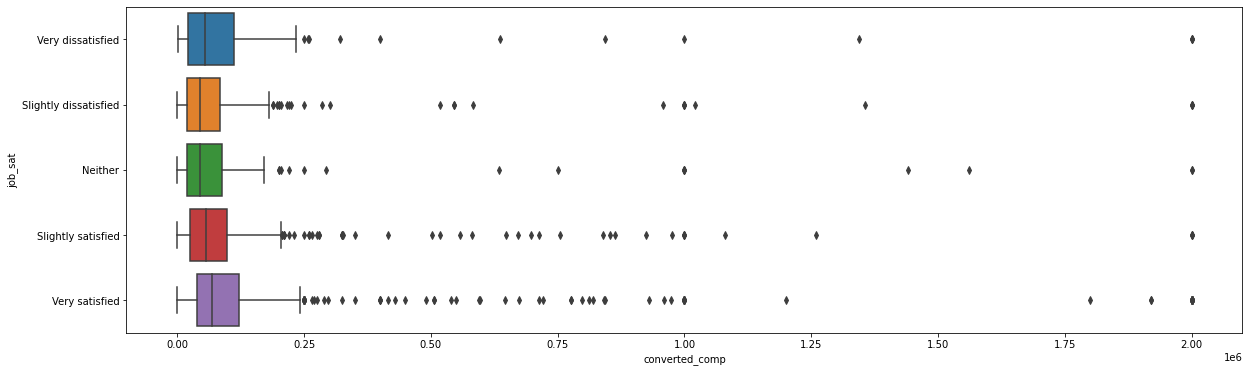

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
sns.boxplot(
  data=stack_overflow,
  x='converted_comp',
  y='job_sat'
)
plt.show()

## Proportion Tests